# Exercícios de Agrupamento de Dados

## Introdução

Utilizaremos a base de dados `Wine_Quality_Data` já utilizada anteriormente.

Utilizaremos as propriedades químicas (tudo menos a qualidade e cor do vinho) para agrupar os vinhos. Apesar de ser um aprendizado não-supervisionado, pode ser interessante contrastar os agrupamentos com as variáveis alvo.

## Exercício 1

* Importe os dados e examine os atributos. 
* Note que temos variáveis contínua, categórical e binária. 
* Quantas amostras temos para as duas cores e para os diferentes valores de qualidade? 
* Faça um histograma da qualidade para cada cor de vinho.

In [24]:
import pandas as pd

# Import the data
filepath = 'data/Wine_Quality_Data.csv'
data = pd.read_csv(filepath)

data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [18]:
data.shape

(6497, 13)

Verifique os tipos dos atributos, note que todos os atributos que trabalharemos são numéricos.

In [19]:
# na verdade a cor não é numérica
# para mudar usaríamos
# data['color'] = data.color.replace({'red': 1, 'white': 0})
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

Vamos contar quantas entradas para cada cor de vinho.

In [20]:
data.color.value_counts()

white    4898
red      1599
Name: color, dtype: int64

E as entradas da qualidade.

In [21]:
data.quality.value_counts().sort_index()

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

Agora plotaremos o histograma:

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

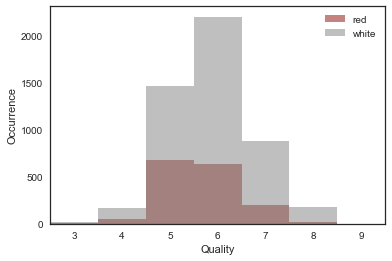

In [23]:
# seaborn styles
sns.set_context('notebook')
sns.set_style('white')
sns.set_palette('dark')

# custom colors
red = sns.color_palette()[2]
white = 'gray'

# set bins for histogram
bin_range = np.array([3, 4, 5, 6, 7, 8, 9])

# plot histogram of quality counts for red and white wines
ax = plt.axes()
for color, plot_color in zip(['red', 'white'], [red, white]):
    q_data = data.loc[data.color==color, 'quality']
    q_data.hist(bins=bin_range, 
                alpha=0.5, ax=ax, 
                color=plot_color, label=color)
    

ax.legend()
ax.set(xlabel='Quality', ylabel='Occurrence')

# force tick labels to be in middle of region
ax.set_xlim(3,10)
ax.set_xticks(bin_range+0.5)
ax.set_xticklabels(bin_range);
ax.grid('off')

## Exercício 2

* Vamos verificar a correlação e viés das variáveis (exceto para as variáveis alvo).
* Aplique a transformação ou escala apropriada.
* Examine a distribuição par a par das variáveis com pairplots para verificar escala e normalização.


In [ ]:
float_columns = [x for x in data.columns if x not in ['color', 'quality']]

# Use o método que gera a matriz de correlação
corr_mat = data[float_columns].???

# Deixe os elementos da diagonal como 0.0
for x in range(len(float_columns)):
    corr_mat.iloc[x,x] = ???
    
corr_mat

In [ ]:
# Aplique o método da função absoluta e que retorna o id com máxima correlação
corr_mat.???.???

Vamos examinar o viés:

In [ ]:
skew_columns = (data[float_columns]
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

In [ ]:
# Que função aplicamos nesse caso?
for col in skew_columns.index.tolist():
    data[col] = ???(data[col])


Vamos escalonar os atributos:

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data[float_columns] = sc.fit_transform(???)

data.head(4)

Agora vamos verificar o pairplot dos atributos:

In [ ]:
sns.set_context('notebook')
sns.pairplot(data[float_columns + ['color']], 
             hue='color', 
             hue_order=['white', 'red'],
             palette={'red':red, 'white':'gray'});

## Exercício 3

* Aplique o K-means com dois clusters.
* Examine os clusters pela cor do vinho.

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=???, random_state=42)
km = km.fit(???)

data['kmeans'] = km.predict(???)

In [ ]:
(data[['color','kmeans']]
 .groupby(['color','kmeans'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

## Exercício 4

* Agora aplique o K-Means para valores de k de 1 a 20.
* Para cada modelo, armazene o número de clusters e o valor da inércia.
* Plote a relação e verifique qual o valor ideal de k.

A inércia é a soma das distâncias dos pontos aos centros, quanto menor esse valor, aparentemente melhor. Mas sempre será melhor?

In [ ]:
# Create and fit a range of models
km_list = list()

for clust in range(1,21):
    km = KMeans(n_clusters=???, random_state=42)
    km = km.fit(???)
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

In [ ]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');

## Exercício 5

* Vamos aplicar um agrupamento hierárquico com dois clusters.
* Compare os resultados obtidos pelo K-means com relação a cor de vinho.
* Iremos criar um dendrograma do agrupamento produzido utilizando o módulo [`cluster.hierarchy`](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy) da biblioteca  SciPy.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=???, linkage='ward', compute_full_tree=True)
ag = ag.fit(???)
data['agglom'] = ag.fit_predict(???)

Note que a atribuição do índice de clusters é arbitrária, não necessariamente corresponde ao mesmo obtido pelo K-Means.

In [ ]:
(data[['color','agglom','kmeans']]
 .groupby(['color','agglom','kmeans'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

Agora vamos plotar o dendrograma obtido.

In [ ]:
from scipy.cluster import hierarchy
from matplotlib import colors

Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

# Some color customization
dark_palette = sns.color_palette()
red = colors.to_hex(dark_palette[2])
blue = colors.to_hex(dark_palette[0])

hierarchy.set_link_color_palette([red, 'gray'])

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color=blue)

## Exercício 6

Nesse exercício vamos explorar o uso de agrupamento de dados como uma criação de atributos.

* Crie um atributo **binário** chamado `y`, cujo valor é 0 se a qualidade do vinho for menor ou igual a 7 e 1 caso contrário.
* Crie uma variável chamada `X_with_kmeans` extraído de `data`, fazendo drop das colunas "quality", "color" e "agglom" da nossa base de dados. Crie `X_without_kmeans` fazendo drop também da coluna "kmeans".
* Para as duas bases, use `StratifiedShuffleSplit` com 10 splits, e aplique Regressão Logística medindo o roc-auc scores.
* Compare a média para a base com kmeans e sem kmeans.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit


y = ???
X_with_kmeans = data.drop(['agglom', 'color', 'quality'], axis=1)
X_without_kmeans = X_with_kmeans.drop('kmeans', axis=1)
sss = StratifiedShuffleSplit(n_splits=???, random_state=6532)


def get_avg_roc_10splits(estimator, X, y):
    roc_auc_list = []
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        estimator.fit(???)        
        y_scored = estimator.predict_proba(???)[:, 1]
        roc_auc_list.append(roc_auc_score(y_test, y_scored))
    return np.mean(roc_auc_list)

estimator = LogisticRegression()
roc_with_kmeans = get_avg_roc_10splits(estimator, X_with_kmeans, y)
roc_without_kmeans = get_avg_roc_10splits(estimator, X_without_kmeans, y)
print("Sem kmeans - roc-auc = \"{0}\"".format(roc_without_kmeans))
print("Com kmeans - roc-auc = \"{0}\"".format(roc_with_kmeans))


Vamos verificar se o número de clusters afeta o desempenho do algoritmo:

* Vamos criar uma função `create_kmeans_columns` que cria uma base de dados com o atributo proveniente do kmeans aplicado com um certo k.
* Repetiremos o experimento anterior para k=1..20

In [ ]:
from sklearn.linear_model import LogisticRegression

X_basis = data[float_columns]
sss = StratifiedShuffleSplit(n_splits=10, random_state=6532)


def create_kmeans_columns(k):
    km = KMeans(n_clusters=???)
    km.fit(???)
    km_col = pd.Series(km.predict(???))
    km_cols = pd.get_dummies(km_col, prefix='kmeans_cluster')
    return pd.concat([X_basis, km_cols], axis=1)


estimator = LogisticRegression()
ns = range(1, 21)
roc_auc_list = [get_avg_roc_10splits(estimator, create_kmeans_columns(n), y)
                for n in ns]


# seaborn styles
sns.set_context('notebook')
sns.set_style('white')
sns.set_palette('dark')

ax = plt.axes()
ax.plot(ns, roc_auc_list)
ax.set(
    xticklabels= ns,
    xlabel='number of clusters as features',
    ylabel='average roc-auc over 10 iterations',
    title='KMeans + LogisticRegression'
)
ax.grid(True)